In [135]:
#importing all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
#loading the data

data=pd.read_excel(r'C:\Users\kisho\OneDrive\Desktop\AI Mini Projects\House-Price-Predictor\data\bangalore house price prediction.xlsx')

In [137]:
data.shape

(13320, 9)

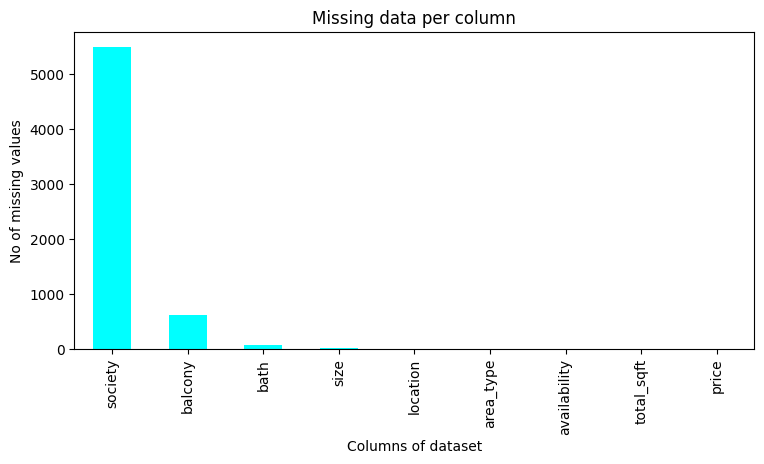

In [120]:
#Missing data graph

plt.figure(figsize=(8,5))
data.isnull().sum().sort_values(ascending=False).plot(kind='bar',color="cyan")
plt.title("Missing data per column")
plt.ylabel("No of missing values")
plt.xlabel("Columns of dataset")
plt.tight_layout(pad=2)
plt.show()

In [121]:
data['area_type'].head()


0    Super built-up  Area
1              Plot  Area
2          Built-up  Area
3    Super built-up  Area
4    Super built-up  Area
Name: area_type, dtype: object

In [122]:
data=data.drop('society',axis=1)

In [123]:
import re

def clean_sqft(x):
    x = str(x).strip()

    # Case 1: Range "2100 - 2850"
    if '-' in x:
        a, b = x.split('-')
        return (float(a) + float(b)) / 2

    # Case 2: Values with units like "34.46Sq. Meter"
    match = re.findall(r"[\d\.]+", x)
    if len(match) == 1:
        return float(match[0])

    # Case 3: Invalid / unhandled values
    return None
data['total_sqft'] = data['total_sqft'].apply(clean_sqft)
data['total_sqft'] = pd.to_numeric(data['total_sqft'], errors='coerce')



In [124]:
corr2=data[['total_sqft','price']].corr()

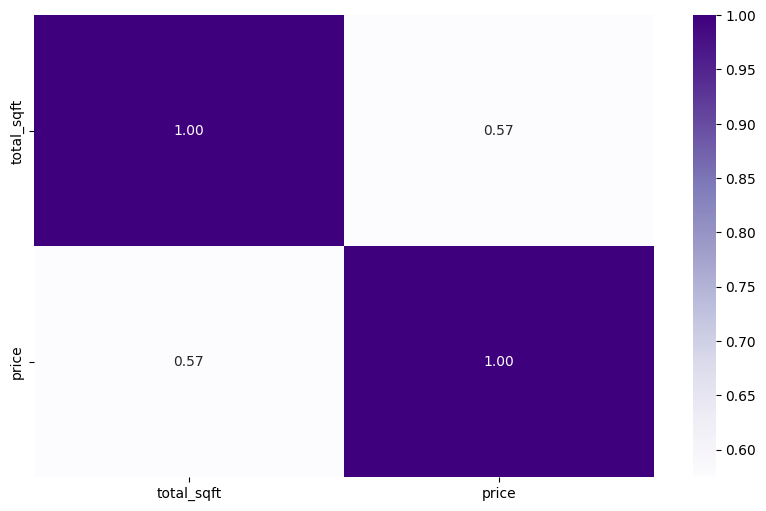

In [125]:
plt.figure(figsize=(10,6))
sns.heatmap(corr2, annot=True, cmap='Purples', fmt=".2f")
plt.show()

In [126]:
corr3=data[['bath','price']].corr()

<Axes: >

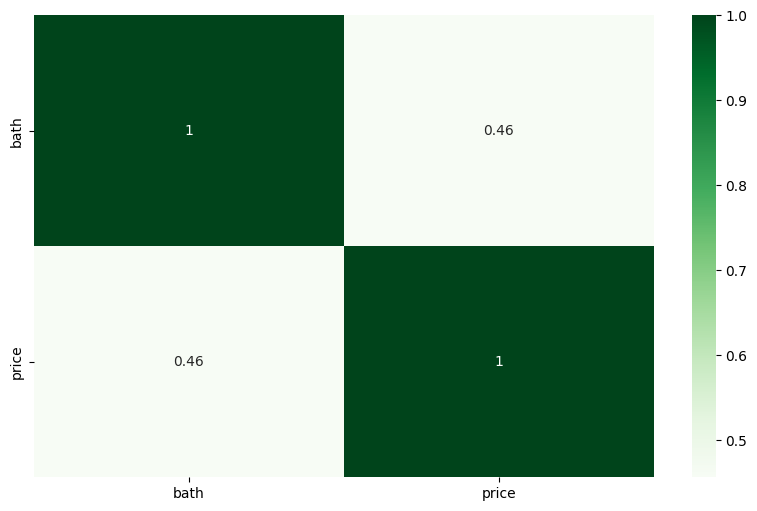

In [127]:
plt.figure(figsize=(10,6))
sns.heatmap(corr3,annot=True,cmap='Greens')

In [128]:
import re

def clean_sqft(x):
    x = str(x).strip()
    match = re.findall(r"[\d\.]+", x)
    if len(match) == 1:
        return float(match[0])

    # Case 3: Invalid / unhandled values
    return None
data['size'] = data['size'].apply(clean_sqft)

In [129]:
data=data.drop(['availability','location'],axis=1)

In [130]:
corr4=data[['size','price']].corr()

<Axes: >

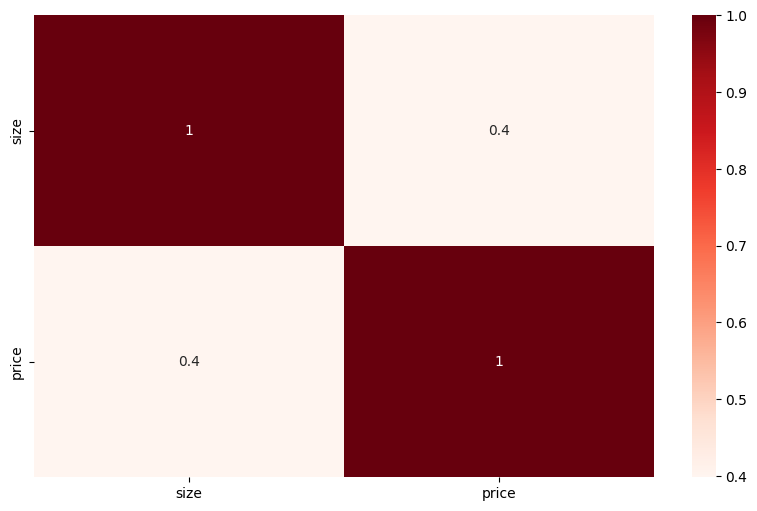

In [131]:
plt.figure(figsize=(10,6))
sns.heatmap(corr4,annot=True,cmap='Reds')


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   size        13304 non-null  float64
 2   total_sqft  13288 non-null  float64
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(5), object(1)
memory usage: 624.5+ KB


In [133]:
data = pd.get_dummies(data, columns=['area_type'], drop_first=False)


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   size                            13304 non-null  float64
 1   total_sqft                      13288 non-null  float64
 2   bath                            13247 non-null  float64
 3   balcony                         12711 non-null  float64
 4   price                           13320 non-null  float64
 5   area_type_Built-up  Area        13320 non-null  bool   
 6   area_type_Plot  Area            13320 non-null  bool   
 7   area_type_Super built-up  Area  13320 non-null  bool   
dtypes: bool(3), float64(5)
memory usage: 559.5 KB


In [159]:
corr5=data[['area_type_Built-up  Area','area_type_Plot  Area','area_type_Super built-up  Area','price']].corr()

<Axes: >

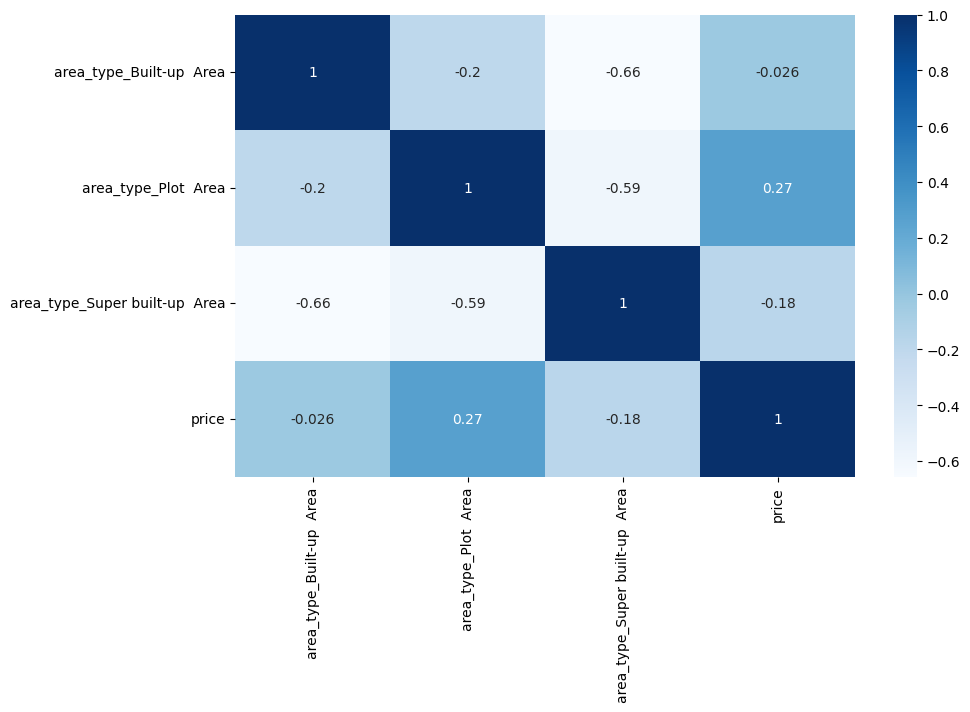

In [160]:
plt.figure(figsize=(10,6))
sns.heatmap(corr5,annot=True,cmap='Blues')

In [161]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   size                            13304 non-null  float64
 1   total_sqft                      13288 non-null  float64
 2   bath                            13247 non-null  float64
 3   balcony                         12711 non-null  float64
 4   price                           13320 non-null  float64
 5   area_type_Built-up  Area        13320 non-null  bool   
 6   area_type_Plot  Area            13320 non-null  bool   
 7   area_type_Super built-up  Area  13320 non-null  bool   
dtypes: bool(3), float64(5)
memory usage: 559.5 KB


In [162]:
data.to_excel('cleaned_house_data.xlsx')